In [27]:
import pandas as pd
import json
import os

In [28]:
# Find all json files in the results folder
results_folder = 'results'
results_files = [f for f in os.listdir(results_folder) if f.endswith('.json')]

# Read results from json files in the results folder into a pandas dataframe
results = pd.DataFrame()
for results_file in results_files:
    with open(os.path.join(results_folder, results_file)) as f:
        data = json.load(f)
        print(data)
        results = pd.concat([results, pd.DataFrame(data)], axis=1)


{'global_l1_pruning': {'accuracy': 0.7659638524055481, 'f1_score': 0.7656566500663757, 'average_inference_time': 0.04192055420703199}}
{'float32': {'accuracy': 0.7657630443572998, 'f1_score': 0.7653846740722656, 'average_inference_time': 0.11787169956299196}, 'quantized': {'accuracy': 0.7633534073829651, 'f1_score': 0.763630211353302, 'average_inference_time': 0.030699547514858015}}
{'layer_fc_cnn_pruning': {'accuracy': 0.7468875646591187, 'f1_score': 0.746800422668457, 'average_inference_time': 0.03211568062563976}}
{'type_aware_pruning': {'accuracy': 0.6147590279579163, 'f1_score': 0.550220787525177, 'average_inference_time': 0.044755621128771676}}
{'layer_cnn_pruning': {'accuracy': 0.7295180559158325, 'f1_score': 0.7297700643539429, 'average_inference_time': 0.031730924744203866}}
{'global_random_pruning': {'accuracy': 0.27339357137680054, 'f1_score': 0.2344137281179428, 'average_inference_time': 0.04423587293509977}}
{'layer_fc_pruning': {'accuracy': 0.7556225061416626, 'f1_score':

In [29]:
results

,global_l1_pruning,float32,quantized,layer_fc_cnn_pruning,type_aware_pruning,layer_cnn_pruning,global_random_pruning,layer_fc_pruning
accuracy,0.765964,0.765763,0.763353,0.746888,0.614759,0.729518,0.273394,0.755623
f1_score,0.765657,0.765385,0.763630,0.746800,0.550221,0.729770,0.234414,0.757846
average_inference_time,0.041921,0.117872,0.030700,0.032116,0.044756,0.031731,0.044236,0.041335


<Axes: title={'center': 'F1 Score'}>

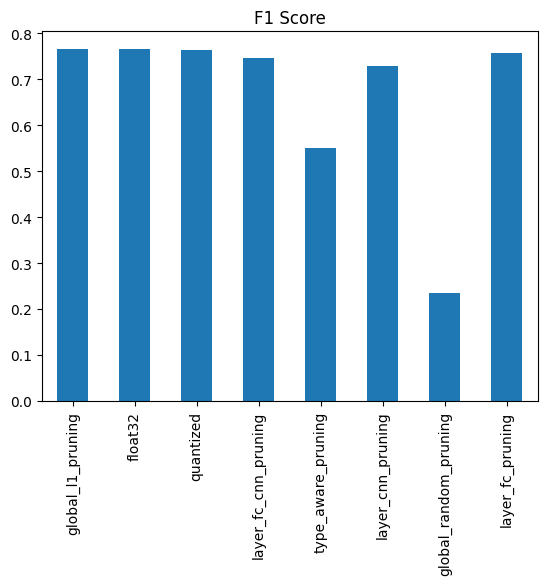

In [30]:
results.loc["f1_score"].plot(kind='bar', title='F1 Score')

<Axes: title={'center': 'Average Inference Time'}>

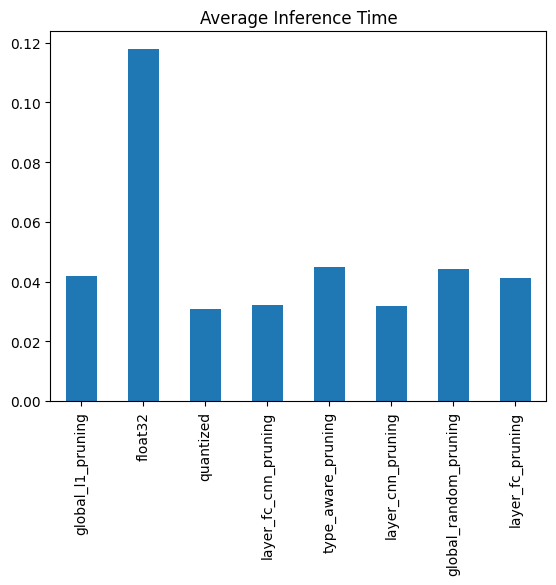

In [31]:
results.loc["average_inference_time"].plot(kind='bar', title='Average Inference Time')

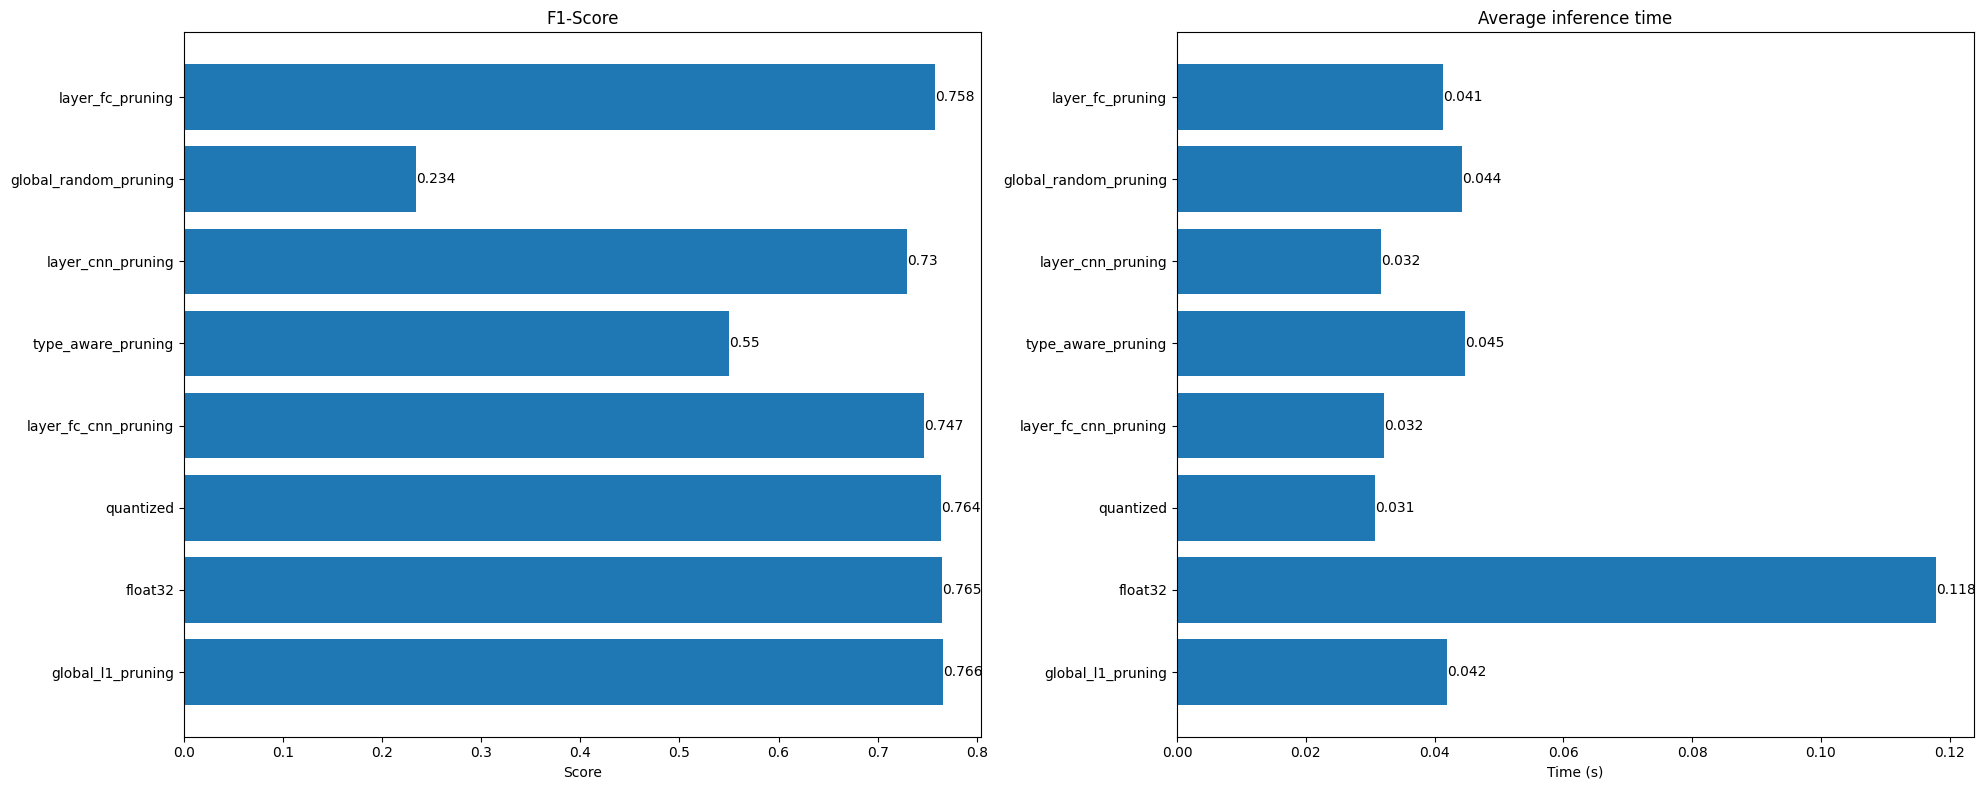

In [32]:
import matplotlib.pyplot as plt

scores = results.loc["f1_score"].tolist()
times = results.loc["average_inference_time"].tolist()
labels = results.columns.tolist()

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# Plot F1-Score
ax[0].barh(labels, scores)
ax[0].set_title("F1-Score")
ax[0].set_xlabel("Score")
for i, v in enumerate(scores):
    ax[0].text(v, i, str(round(v, 3)), color='black', va='center')

# Plot Average Inference Time
ax[1].barh(labels, times)
ax[1].set_title("Average inference time")
ax[1].set_xlabel("Time (s)")
for i, v in enumerate(times):
    ax[1].text(v, i, str(round(v, 3)), color='black', va='center')

plt.tight_layout()
plt.show()
